# K-means algorithm

1. Choose the number of clusters (k)
2. Select k random points from the data as centroids
3. Assign each point to the closest cluster centroid
4. Recompute centroids of newly formed clusters
5. Again assign each point to closest cluster centroid and continue these steps

In [1]:
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('clustering.csv')

In [3]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


In [4]:
X = data[["LoanAmount","ApplicantIncome"]]

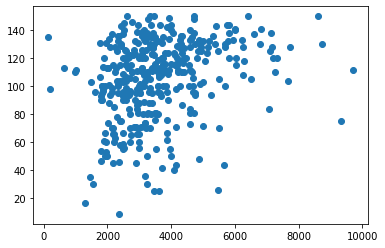

In [6]:
# Visualize the data
plt.scatter(X.ApplicantIncome, X.LoanAmount)

Step 1 - Choose the number of clusters (k) and select random centroid for each cluster

Step 2 - Assign all the points to the closest cluster centroid

Step 3 - Recompute centroids of newly formed clusters

Step 4 - Repeat step 2 and 3.

In [7]:
# Step 1 - Choose the number of clusters (k) and select random centroid for each cluster
#number of clusters
K=3

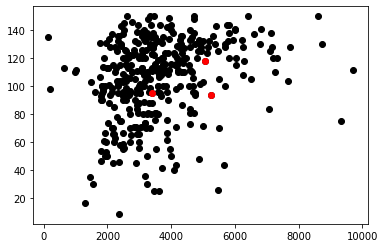

In [38]:
# Select random samples
Centroids = X.sample(K)

plt.scatter(X.ApplicantIncome, X.LoanAmount, c="black")
plt.scatter(Centroids.ApplicantIncome, Centroids.LoanAmount, c="red")


In [39]:
diff = 1
j=0

In [40]:
while(diff!=0):
    XD=X
    i=1
    for index1,row_c in Centroids.iterrows():
        ED=[]
        for index2,row_d in XD.iterrows():
            d1=(row_c["ApplicantIncome"]-row_d["ApplicantIncome"])**2
            d2=(row_c["LoanAmount"]-row_d["LoanAmount"])**2
            d=np.sqrt(d1+d2)
            ED.append(d)
        X[i]=ED
        i=i+1

    C=[]
    for index,row in X.iterrows():
        min_dist=row[1]
        pos=1
        for i in range(K):
            if row.iloc[i+2] < min_dist:
                min_dist = row.iloc[i+2]
                pos = i+1
        C.append(pos)
    X["Cluster"]=C
    Centroids_new = X.groupby(["Cluster"]).mean()[["LoanAmount","ApplicantIncome"]]
    if j == 0:
        diff=1
        j=j+1
    else:
        diff = (Centroids_new['LoanAmount'] - Centroids['LoanAmount']).sum() + (Centroids_new['ApplicantIncome'] - Centroids['ApplicantIncome']).sum()
        print(diff.sum())
    Centroids = X.groupby(["Cluster"]).mean()[["LoanAmount","ApplicantIncome"]]

-8.519510860306696
-203.47280958361705
-111.98961242432297
-163.54033867216276
-137.5036058084487
-121.71293760862933
-46.7501216812597
-46.4934676023523
-55.03495831127759
-9.190752402517077
-9.19844100901777
-9.237706177129652
0.0


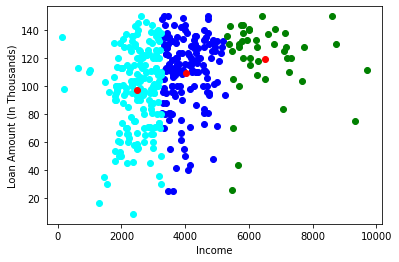

In [37]:
color=['blue','green','cyan']
for k in range(K):
    data=X[X["Cluster"]==k+1]
    plt.scatter(data["ApplicantIncome"],data["LoanAmount"],c=color[k])
plt.scatter(Centroids["ApplicantIncome"],Centroids["LoanAmount"],c='red')
plt.xlabel('Income')
plt.ylabel('Loan Amount (In Thousands)')
plt.show()

## Issue with K-means:
1. When cluster sizes are different. K-means don't work properly here. K-means always tries to create cluster of same size - Sol: Increase number of clusters
2. When density of cluster is different.
3. Problem with random initialization - Every time we might get different clusers. Here, we can train the algo multiple times and then choose the cluster which gives least inertia or optimize other evaluration metrics like Dunn index.

What is optimum number of clusterS?


## Choosing right k-value
Elbow method is used  for finding the optimal number of clusters. The elbow method looks at the percentage of variance explained as a function of the number of clusters: One should choose a number of clusters so that adding another cluster doesn’t give much better modeling of the data.





In [42]:
from sklearn.cluster import KMeans

In [43]:
data=pd.read_csv("student_evaluation.csv")

In [44]:
data.shape

(5820, 33)

In [45]:
data.head()

,instr,class,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,...,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
0,1,2,1,0,4,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
1,1,2,1,1,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
2,1,2,1,2,4,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
3,1,2,1,1,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
4,1,2,1,0,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [46]:
data.describe()

,instr,class,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,...,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
count,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,...,5820.000000,5820.000000,5820.000000,5820.000000,5820.00000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000
mean,2.485567,7.276289,1.214089,1.675601,2.783505,2.929897,3.073883,3.178694,3.082474,3.105842,...,3.261684,3.285395,3.307388,3.317526,3.20189,3.166838,3.312543,3.222165,3.154811,3.308076
std,0.718473,3.688175,0.532376,1.474975,1.348987,1.341077,1.285251,1.253567,1.284594,1.278989,...,1.268442,1.276848,1.269974,1.268358,1.27259,1.275909,1.257286,1.270695,1.291872,1.278709
min,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,4.000000,1.000000,0.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,3.000000,3.000000,3.000000,3.000000,2.00000,2.000000,3.000000,2.000000,2.000000,3.000000
50%,3.000000,7.000000,1.000000,1.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,3.000000,3.000000,3.000000,3.000000,3.00000,3.000000,3.000000,3.000000,3.000000,3.000000
75%,3.000000,10.000000,1.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,4.000000,4.00000,4.000000,4.000000,4.000000,4.000000,4.000000
max,3.000000,13.000000,3.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000


In [47]:
kmeans = KMeans(n_clusters=2)

In [48]:
kmeans.fit(data)

KMeans(n_clusters=2)

In [49]:
pred = kmeans.predict(data)

In [50]:
# 0 and 1 means two clusters and to which cluster the observation falls in?
pred

array([1, 1, 0, ..., 0, 1, 1])

In [51]:
pd.Series(pred).value_counts()

1    3148
0    2672
dtype: int64

In [52]:
kmeans.inertia_

231353.86109925818

In [54]:
kmeans.score(data)

-231353.86109925818

In [ ]:
SSE = []

for cluster in range (1,20):
    kmean = KMeans(n_jobs=-1, n_clusters=cluster)
    kmean.fit(data)
    SSE.append(kmean.inertia_) 

In [57]:
frame = pd.DataFrame(
    {
        "Cluster": range(1,20),
        "SSE": SSE
    }

)

Text(0, 0.5, 'Inertia')

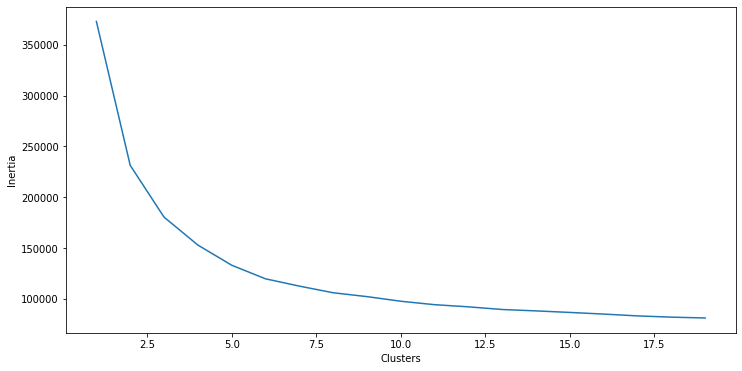

In [61]:
plt.figure(figsize = (12,6))
plt.plot(frame.Cluster, frame.SSE)
plt.xlabel("Clusters")
plt.ylabel("Inertia")

But But But.... we need to normalize the data first.

In [62]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()

data_scaled = scalar.fit_transform(data)

In [64]:
type(data_scaled)

numpy.ndarray

In [67]:
data_scaled = pd.DataFrame(data_scaled)

In [69]:
data_scaled.describe()

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
count,5.820000e+03,5.820000e+03,5.820000e+03,5.820000e+03,5.820000e+03,5.820000e+03,5.820000e+03,5.820000e+03,5.820000e+03,5.820000e+03,...,5.820000e+03,5.820000e+03,5.820000e+03,5.820000e+03,5.820000e+03,5.820000e+03,5.820000e+03,5.820000e+03,5.820000e+03,5.820000e+03
mean,1.562706e-16,9.766910e-17,2.051051e-16,-6.592665e-17,4.028851e-17,1.269698e-16,-1.660375e-16,1.465037e-16,-1.172029e-16,-1.953382e-17,...,7.325183e-17,8.790219e-17,1.855713e-16,-1.562706e-16,-1.269698e-16,1.172029e-16,-2.051051e-16,-8.301874e-17,8.301874e-17,1.709209e-16
std,1.000086e+00,1.000086e+00,1.000086e+00,1.000086e+00,1.000086e+00,1.000086e+00,1.000086e+00,1.000086e+00,1.000086e+00,1.000086e+00,...,1.000086e+00,1.000086e+00,1.000086e+00,1.000086e+00,1.000086e+00,1.000086e+00,1.000086e+00,1.000086e+00,1.000086e+00,1.000086e+00
min,-2.067850e+00,-1.701879e+00,-4.021740e-01,-1.136118e+00,-1.322221e+00,-1.439189e+00,-1.613740e+00,-1.738145e+00,-1.621254e+00,-1.646630e+00,...,-1.783194e+00,-1.790026e+00,-1.817034e+00,-1.827343e+00,-1.730392e+00,-1.698417e+00,-1.839472e+00,-1.748929e+00,-1.668120e+00,-1.805160e+00
25%,-6.758900e-01,-8.883988e-01,-4.021740e-01,-1.136118e+00,-1.322221e+00,-6.934552e-01,-8.356154e-01,-9.403527e-01,-8.427308e-01,-8.646959e-01,...,-2.063210e-01,-2.235345e-01,-2.420638e-01,-2.503655e-01,-9.445255e-01,-9.145943e-01,-2.486068e-01,-9.618909e-01,-8.939823e-01,-2.409479e-01
50%,7.160704e-01,-7.491846e-02,-4.021740e-01,-4.580819e-01,1.605008e-01,5.227822e-02,-5.749034e-02,-1.425608e-01,-6.420806e-02,-8.276145e-02,...,-2.063210e-01,-2.235345e-01,-2.420638e-01,-2.503655e-01,-1.586587e-01,-1.307718e-01,-2.486068e-01,-1.748524e-01,-1.198450e-01,-2.409479e-01
75%,7.160704e-01,7.385619e-01,-4.021740e-01,8.979896e-01,9.018615e-01,7.980117e-01,7.206347e-01,6.552312e-01,7.143147e-01,6.991730e-01,...,5.821153e-01,5.597111e-01,5.454215e-01,5.381232e-01,6.272081e-01,6.530507e-01,5.468257e-01,6.121861e-01,6.542923e-01,5.411584e-01
max,7.160704e-01,1.552042e+00,3.354893e+00,1.576025e+00,1.643222e+00,1.543745e+00,1.498760e+00,1.453023e+00,1.492837e+00,1.481107e+00,...,1.370552e+00,1.342957e+00,1.332907e+00,1.326612e+00,1.413075e+00,1.436873e+00,1.342258e+00,1.399225e+00,1.428430e+00,1.323265e+00


In [ ]:
SSE_scaled = []

for cluster in range(1,20):
    kmeans = KMeans(n_jobs = -1, n_clusters = cluster)
    kmeans.fit(data_scaled)
    SSE_scaled.append(kmeans.inertia_)

Text(0, 0.5, 'SSE')

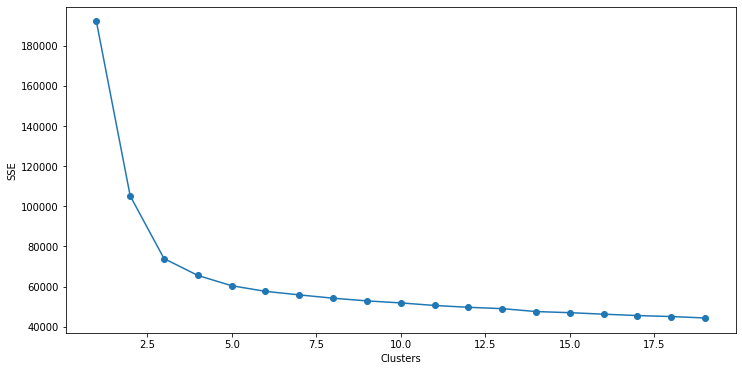

In [71]:
plt.figure(figsize=(12,6))
frame_scaled = pd.DataFrame({'Cluster':range(1,20), 'SSE':SSE_scaled})
plt.plot(frame_scaled['Cluster'], frame_scaled['SSE'], marker='o')
plt.xlabel("Clusters")
plt.ylabel("SSE")

In [72]:
kmeans = KMeans(n_jobs = -1, n_clusters = 4)
kmeans.fit(data_scaled)
pred = kmeans.predict(data_scaled)

c:\Users\Neelam\Desktop\Desktop\Python\Video\env\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


In [73]:
pd.Series(pred).value_counts()

2    2101
3    1666
1    1196
0     857
dtype: int64

In [76]:
frame = pd.DataFrame(data_scaled)

In [77]:
frame['clusters'] = pred

In [78]:
frame.head()

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,clusters
0,-2.06785,-1.430719,-0.402174,-1.136118,0.901862,0.052278,-0.05749,-0.142561,-0.064208,-0.082761,...,-0.223535,-0.242064,-0.250365,-0.158659,-0.130772,-0.248607,-0.174852,-0.119845,-0.240948,2
1,-2.06785,-1.430719,-0.402174,-0.458082,0.160501,0.052278,-0.05749,-0.142561,-0.064208,-0.082761,...,-0.223535,-0.242064,-0.250365,-0.158659,-0.130772,-0.248607,-0.174852,-0.119845,-0.240948,2
2,-2.06785,-1.430719,-0.402174,0.219954,0.901862,1.543745,1.49876,1.453023,1.492837,1.481107,...,1.342957,1.332907,1.326612,1.413075,1.436873,1.342258,1.399225,1.428430,1.323265,0
3,-2.06785,-1.430719,-0.402174,-0.458082,0.160501,0.052278,-0.05749,-0.142561,-0.064208,-0.082761,...,-0.223535,-0.242064,-0.250365,-0.158659,-0.130772,-0.248607,-0.174852,-0.119845,-0.240948,2
4,-2.06785,-1.430719,-0.402174,-1.136118,-1.322221,-1.439189,-1.61374,-1.738145,-1.621254,-1.646630,...,-1.790026,-1.817034,-1.827343,-1.730392,-1.698417,-1.839472,-1.748929,-1.668120,-1.805160,1


# Hierarchical Clusering

No need to decise the number of clusters in beginning

## Types:
1. Agglomerative:
    - Assign each point as a separate cluster
    - Merge the closest pair of clustes until only single cluster is left
2. Divisive
    - Assign all the points to a single cluster
    - Split the clusters until each cluster contains a single point

## Steps to perform Hierarchical Clustering
1. Assign each point as a seperate cluster.
2. Merge the closest clusters as per the proximity matrix. Then, update the proximity matrix. 
    -Proximity matrix is based on Euclidian distance.
3. Repeat step 2 until only a single cluster is left

https://courses.analyticsvidhya.com/courses/take/ai-ml-blackbelt-accelerate-b2/lessons/22150904-hierarchical-clustering

## How do we decide number of clusters?




